In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-02-15 11:14:02--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-02-15 11:14:03 (29.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

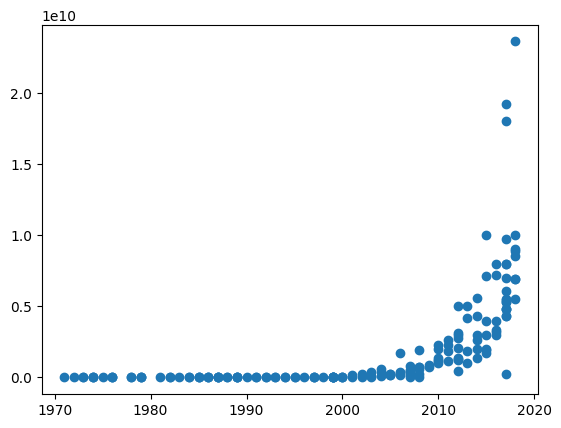

In [5]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

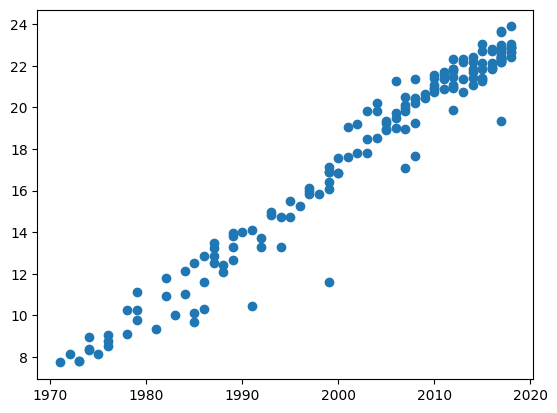

In [6]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)
# that's better

In [7]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [8]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 488.7394 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 359.6606 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 231.1865 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 241.7523 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 254.7030 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 174.9767 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 93.5912 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 87.2498 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 57.5553 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 40.4692 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 4

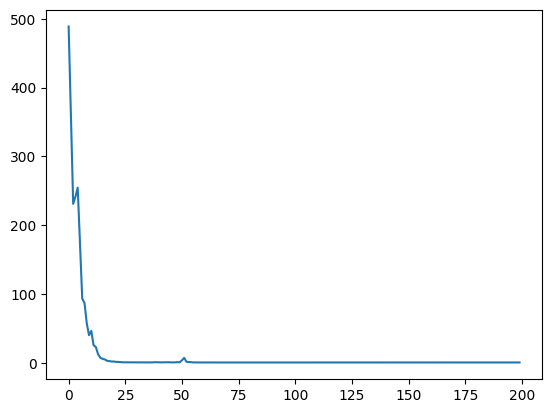

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [10]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.33668396]], dtype=float32), array([17.771288], dtype=float32)]


In [12]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

Our original model for exponential growth is:
C=A0rt

Where C
is transistor the count and t

is the year.

r
is the rate of growth. For example, when t goes from 1 to 2, C increases by a factor of r. When t goes from 2 to 3, C increases by a factor of r

again.

When we take the log of both sides, we get:
logC=logr∗t+logA0

This is our linear equation:
^y=ax+b

Where:
^y=logCa=logrx=tb=logA0

We are interested in r

, because that's the rate of growth. Given our regression weights, we know that:
a=0.34188038

so that:
r=e0.34188038=1.4076

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for C
to increase to 2C

.

Let's call the original starting time t
, to correspond with the initial transistor count C

.

Let's call the end time t′
, to correspond with the final transistor count 2C

.

Then we also have:
2C=A0rt′

Combine this with our original equation:
C=A0rt

We get (by dividing the 2 equations):
2C/C=(A0rt′)/A0rt

Which simplifies to:
2=r(t′−t)

Solve for t′−t

:
t′−t=log2logr=log2a

Important note! We haven't specified what the starting time t
actually is, and we don't have to since we just proved that this holds for any t.

In [13]:
print("Time to double:", np.log(2) / a)

Time to double: 2.058747268787569


In [14]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


6/6 [==============================] - 0s 2ms/step


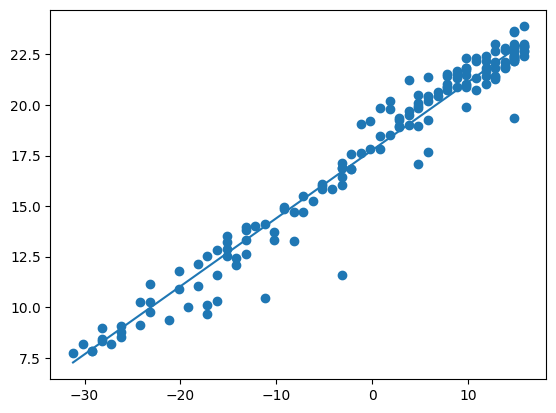

In [15]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [16]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True